# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [2]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


In [3]:
# your code here
df = pd.read_csv("tic-tac-toe.csv")

print(df.head())
print(df.info())
print(df.describe())


  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None
         TL   TM   TR   ML   MM   MR   BL   BM   BR class
count   958  958  958  958  958  958  958  958  958   958
unique    3    3    3    3    3    3    3    3    3     2
top       x    x  

In [4]:
# x -> 1, o -> -1, b -> 0
mapping = {'x': 1, 'o': -1, 'b': 0}
for col in df.columns[:-1]: 
    df[col] = df[col].map(mapping)

# True -> 1, False -> 0
df['class'] = df['class'].astype(int)


In [5]:
df

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,-1,1,1,1,-1,-1,-1,1,1,0
954,-1,1,-1,1,1,-1,1,-1,1,0
955,-1,1,-1,1,-1,1,1,-1,1,0
956,-1,1,-1,-1,1,1,1,-1,1,0


In [6]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values  

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:
X

array([[ 1.03516957,  1.10682993,  1.03516957, ...,  1.03516957,
        -1.2235944 , -1.23155602],
       [ 1.03516957,  1.10682993,  1.03516957, ..., -1.23155602,
         1.10682993, -1.23155602],
       [ 1.03516957,  1.10682993,  1.03516957, ..., -1.23155602,
        -1.2235944 ,  1.03516957],
       ...,
       [-1.23155602,  1.10682993, -1.23155602, ...,  1.03516957,
        -1.2235944 ,  1.03516957],
       [-1.23155602,  1.10682993, -1.23155602, ...,  1.03516957,
        -1.2235944 ,  1.03516957],
       [-1.23155602, -1.2235944 ,  1.03516957, ..., -1.23155602,
         1.10682993,  1.03516957]])

In [8]:
X.shape

(958, 9)

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [9]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(16, activation='relu', input_shape=(9,)),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.1)


Epoch 1/20


C:\Users\R\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5942 - loss: 0.7099 - val_accuracy: 0.7273 - val_loss: 0.5819
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - accuracy: 0.6970 - loss: 0.5999 - val_accuracy: 0.7792 - val_loss: 0.5251
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.7387 - loss: 0.5683 - val_accuracy: 0.8052 - val_loss: 0.4927
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8060 - loss: 0.5030 - val_accuracy: 0.8052 - val_loss: 0.4677
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7582 - loss: 0.5125 - val_accuracy: 0.8312 - val_loss: 0.4388
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7879 - loss: 0.4722 - val_accuracy: 0.8312 - val_loss: 0.4225
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4275 - val_accuracy: 0.8182 - val_loss: 0.3932
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.4003 - val_accuracy: 0.8571 - val_loss: 0.

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.1388 
Test Accuracy: 0.9844


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [ ]:
# your code here
model.save("tic-tac-toe.model.keras")

In [12]:
import random
random_indices = random.sample(range(len(X_test)), 5)
predictions = model.predict(X_test[random_indices])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = y_test[random_indices]

for i, index in enumerate(random_indices):
    print(f"Row {index}: Predicted = {predicted_classes[i]}, Actual = {actual_classes[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Row 146: Predicted = 1, Actual = 1
Row 2: Predicted = 1, Actual = 1
Row 154: Predicted = 1, Actual = 1
Row 178: Predicted = 1, Actual = 1
Row 76: Predicted = 1, Actual = 1


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [13]:
# your code here
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(9,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='sigmoid')  
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f} Test loss: {loss:.4f}")

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6059 - loss: 0.6635 - val_accuracy: 0.7532 - val_loss: 0.5663
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7004 - loss: 0.5556 - val_accuracy: 0.7403 - val_loss: 0.5275
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7619 - loss: 0.4978 - val_accuracy: 0.8052 - val_loss: 0.4702
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8287 - loss: 0.4198 - val_accuracy: 0.8182 - val_loss: 0.4082
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9106 - loss: 0.2717 - val_accuracy: 0.9091 - val_loss: 0.2769
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1800 - val_accuracy: 0.9740 - val_loss: 0.1791
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9810 - loss: 0.1072 - val_accuracy: 0.9610 - val_loss: 0.1218
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9911 - loss: 0.0664 - val_accuracy: 0.9740 - val_loss:

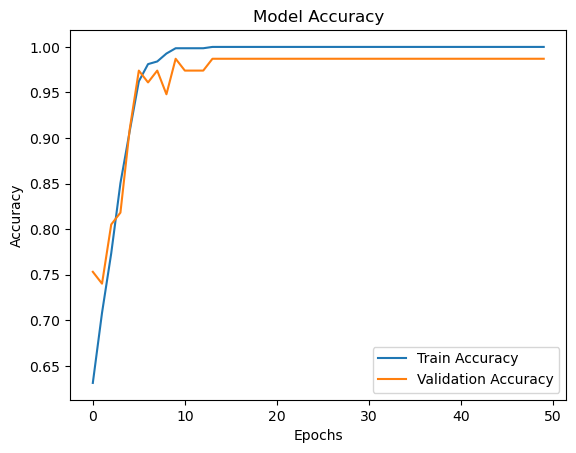

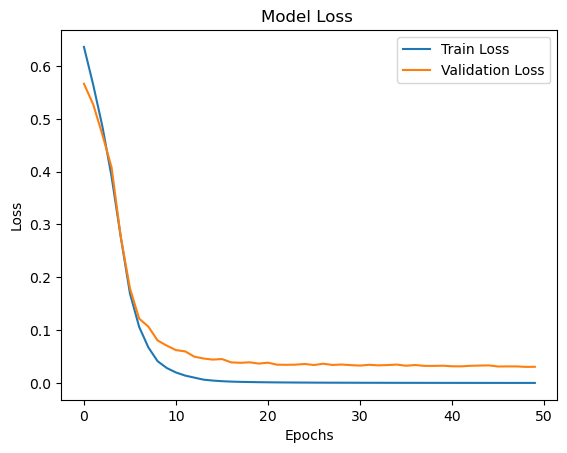

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss ')
plt.show()

**Which approach(es) did you find helpful to improve your model performance?**

The result is improve by:
- add learning rate
- add more layer
- increase epoch
- change the activation of the output layer to (sigmiod) -> binary problem 